| **Inicio** | **atrás 38** | **Siguiente 40** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./38.Datos_Entrenamiento.ipynb)| [⏩](./40.Escalamiento_Normalizacion_Estandarizacion.ipynb)|

# **39. K-Vecinos Más Cercanos (KNN) para Clasificación con Python**

## **Interpretación básica**

K-Vecinos Más Cercanos (KNN) es un algoritmo de aprendizaje supervisado utilizado para clasificación y regresión. En este caso, se explicará la versión para clasificación.

El algoritmo KNN clasifica nuevos puntos de datos basándose en la "cercanía" a los puntos de datos existentes en un conjunto de entrenamiento. En otras palabras, se calcula la distancia entre el nuevo punto de datos y los puntos de datos existentes en el conjunto de entrenamiento, y se seleccionan los "k" puntos más cercanos. La clase del nuevo punto de datos se determina por mayoría de votos de los "k" puntos más cercanos.



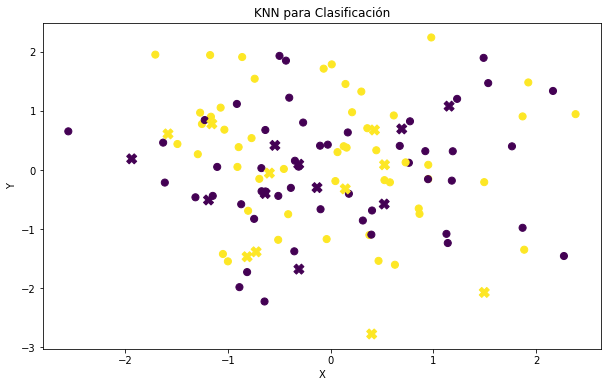

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generar datos de entrenamiento
np.random.seed(0)
X_train = np.random.randn(100, 2)
y_train = np.random.randint(0, 2, 100)

# Generar datos de prueba
X_test = np.random.randn(20, 2)

# Definir el modelo KNN con k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir las etiquetas de clase para los datos de prueba
y_pred = knn.predict(X_test)

# Visualizar los resultados en un gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=100, cmap='viridis', marker='X')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN para Clasificación')
plt.show()

En este ejemplo, se generan datos de entrenamiento y prueba aleatorios utilizando la función ```numpy.random.randn()```. Luego, se define el modelo KNN con un valor de k=3 utilizando la clase ```KNeighborsClassifier``` de Scikit-Learn y se entrena con los datos de entrenamiento utilizando el método ```fit()```. Después de entrenar el modelo, se utilizan los datos de prueba para predecir las etiquetas de clase utilizando el método ```predict()```. Finalmente, se visualizan los resultados en un gráfico utilizando la función ```matplotlib.pyplot.scatter()```.

## **Datos y contexto**

Los K-Vecinos Más Cercanos (KNN) es un algoritmo de aprendizaje supervisado de clasificación y regresión que se basa en la distancia entre los datos para determinar su similitud y, por tanto, su clasificación o predicción.

Un ejemplo de contexto en el que se puede utilizar KNN es en la clasificación de especies de flores en función de sus características como el tamaño de los pétalos y sépalos. Supongamos que tenemos un conjunto de datos que contiene estas características para diferentes flores de tres especies diferentes: setosa, versicolor y virginica. Queremos construir un modelo que pueda predecir la especie de una flor desconocida en función de sus características. Podríamos utilizar el algoritmo KNN para clasificar la flor desconocida en una de las tres especies en función de la similitud entre sus características y las de las flores conocidas en el conjunto de datos.

Aquí hay un ejemplo de código y gráfico para ilustrar el funcionamiento de KNN en la clasificación de flores iris utilizando Scikit-Learn:



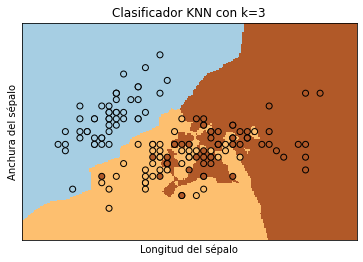

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Cargar el conjunto de datos iris
iris = load_iris()

# Tomar solo las primeras dos características para facilitar la visualización
X = iris.data[:, :2]
y = iris.target

# Crear una instancia del clasificador KNN con k = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Ajustar el modelo a los datos de entrenamiento
knn.fit(X, y)

# Crear una cuadrícula de puntos para la visualización
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Realizar predicciones en la cuadrícula de puntos
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Crear la visualización
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Agregar los puntos de datos a la visualización
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Longitud del sépalo')
plt.ylabel('Anchura del sépalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Clasificador KNN con k=3')
plt.show()

El resultado es un gráfico que muestra la clasificación de las flores iris utilizando KNN con un valor de k=3. Los puntos de datos son los círculos coloreados y las áreas coloreadas representan las regiones de decisión del clasificador.

## **Explicación KNN**

k-Vecinos Más Cercanos (KNN) es un algoritmo de aprendizaje supervisado utilizado para la clasificación y la regresión. En el caso de la clasificación, se refiere a la predicción de una etiqueta de clase para una observación basada en la similitud de características con los vecinos más cercanos en un conjunto de datos etiquetados.

En el KNN, la "k" se refiere al número de vecinos más cercanos que se consideran al hacer la predicción. Para realizar una predicción, KNN compara la observación que se va a predecir con las observaciones del conjunto de datos etiquetado para encontrar los "k" vecinos más cercanos en términos de distancia euclidiana. Luego, utiliza la etiqueta de clase más común entre los vecinos más cercanos para hacer la predicción.

Primero, importamos las bibliotecas necesarias y cargamos los datos de las flores Iris en un DataFrame de Pandas:

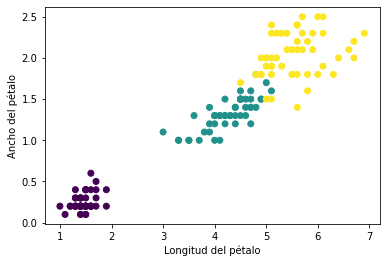

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:]  # seleccionar las dos características del pétalo
y = iris.target

# visualizar los datos
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.show()

El resultado es un gráfico de dispersión de los datos, donde cada punto representa una flor y su color indica su clase:

A continuación, dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba:

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ahora, entrenemos un modelo KNN con k=3 (es decir, considerando los 3 vecinos más cercanos) en el conjunto de entrenamiento:

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Finalmente, podemos visualizar las regiones de decisión del modelo en un gráfico. Para ello, generamos una malla de puntos en el espacio de características y clasificamos cada punto usando el modelo KNN. Luego, coloreamos cada punto según su clase predicha:

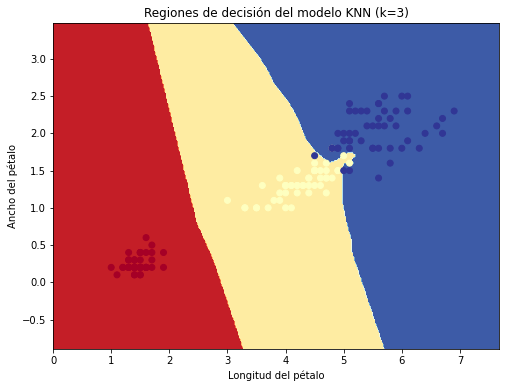

In [11]:
# definir límites de los ejes x e y
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# definir la resolución de la malla
h = 0.02

# generar una malla de puntos en el espacio de características
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# clasificar cada punto de la malla usando el modelo KNN
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# darle forma de malla a los resultados de la clasificación
Z = Z.reshape(xx.shape)

# visualizar las regiones de decisión del modelo
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title(f'Regiones de decisión del modelo KNN (k={knn.n_neighbors})')
plt.show()

## **Construcción modelo**

Primero, importamos las bibliotecas necesarias:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Generamos un conjunto de datos sintéticos usando ```make_classification()``` de Scikit-Learn:

In [13]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

Dividimos los datos en conjuntos de entrenamiento y prueba:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Creamos un modelo de clasificación KNN:

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

Entrenamos el modelo con los datos de entrenamiento:

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Generamos un mapa de calor para visualizar las regiones de decisión del modelo:

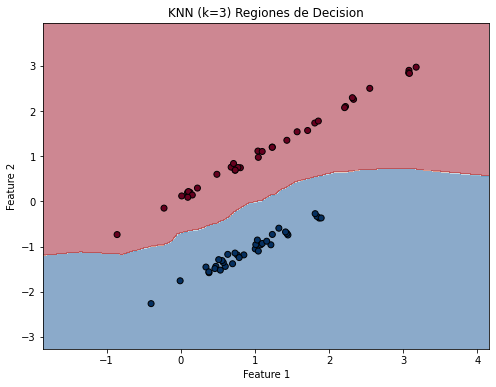

In [17]:
# Graficar regiones de decision
h = 0.02  # paso del mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu_r, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN (k=3) Regiones de Decision')
plt.show()

Finalmente, evaluamos la precisión del modelo con los datos de prueba:

In [18]:
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {acc:.2f}")

Precisión del modelo: 1.00


## **Evaluación**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear un conjunto de datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de KNN con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = knn.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.915


Este código primero genera un conjunto de datos de ejemplo con ```make_classification```, luego divide los datos en conjuntos de entrenamiento y prueba con ```train_test_split```. Luego crea un modelo de KNN con 5 vecinos, lo entrena con los datos de entrenamiento y realiza predicciones con los datos de prueba. Finalmente, evalúa la precisión del modelo en el conjunto de prueba utilizando la función ```accuracy_score``` de Scikit-Learn.

La salida del código será la precisión del modelo en el conjunto de prueba.





## **Regiones de clases**

Las regiones de clases son áreas del espacio de características donde los puntos pertenecen a una clase específica. En una tarea de clasificación, la región de clase se define por la frontera de decisión, que es la línea que separa las regiones de las diferentes clases. En general, la región de clase se vuelve más compleja a medida que aumenta la dimensionalidad de los datos.

Las regiones de clases son áreas en el espacio de características donde un modelo de clasificación asigna una etiqueta de clase particular. Estas regiones pueden ser visualizadas en un gráfico para tener una mejor comprensión de cómo se realiza la clasificación en un problema de clasificación binaria o multiclase. Aquí hay un ejemplo de cómo se pueden visualizar las regiones de clase de un clasificador SVM utilizando Python y Scikit-Learn:

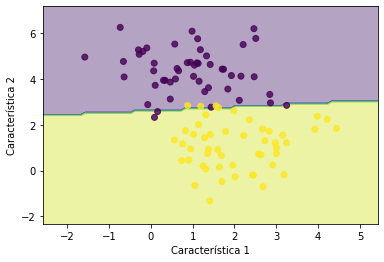

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generar datos de prueba
X, y = make_blobs(n_samples=100, centers=2, random_state=0)

# Crear un clasificador SVM
clf = SVC(kernel='linear', C=1000)

# Entrenar el clasificador
clf.fit(X, y)

# Crear una malla para el gráfico
xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1), np.arange(ymin, ymax, 0.1))

# Predecir la etiqueta de clase para cada punto en la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar las regiones de clase y los puntos de datos
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

Este código generará un gráfico que muestra las regiones de clase del clasificador SVM para los datos de prueba generados aleatoriamente. Las regiones de clase se muestran en diferentes colores, y los puntos de datos se muestran con diferentes formas según su etiqueta de clase.

| **Inicio** | **atrás 38** | **Siguiente 40** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./38.Datos_Entrenamiento.ipynb)| [⏩](./40.Escalamiento_Normalizacion_Estandarizacion.ipynb)|